## Ex1 Use data from Danmarks Statistik - Databanken
1. Go to https://www.dst.dk/da/Statistik/brug-statistikken/muligheder-i-statistikbanken/api#testkonsol
2. Open 'Konsol' and click 'Start Konsol'
3. In the console at pt 1: choose 'Retrieve tables', pt 2: choose get request and json format and pt 3: execute:
  1. check the result
  2. in the code below this same get request is used to get information about all available data tables in 'databanken'. 
4. Change pt. 1 in the console to 'Retrieve data', pt 2: 'get request' and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.
5. With data aggregation and data visualization answer the following questions:
  1. What is the change in pct of divorced danes from 2008 to 2020?
  2. Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
  3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
  4. Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs
  
## Ex2 Use another table (extra)
Choose any of the other tables in 'databanken' to find interesting data.
1. Collect the data
2. Pose 5 or more interesing questions to the data
3. Answer the questions by aggregating the data
4. Illustrate the answers with visual plots

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
#1.5.A
fcsv = './FOLK1A_5a.csv'
data_a = pd.read_csv(fcsv, sep=';')
data_a_indhold = data_a["INDHOLD"]
diff = ((data_a_indhold[1] - data_a_indhold[0]) / data_a_indhold[0]) * 100
print("The change in percent from 2008 to 2020 is:", diff)

The change in percent from 2008 to 2020 is: 28.809832487688404


In [3]:
# 1.5.B
fcsv_2 = './FOlK1A_5b.csv'
data_b = pd.read_csv(fcsv_2, sep=';')

areas = []

for i in range(0, len(data_b.index), 2):
    area_name = data_b.iloc[i, 1]
    area_population = data_b.iloc[i, 3]
    area_unmarried = data_b.iloc[i + 1, 3]
    area_unmarried_pct = round(area_unmarried / area_population * 100, 2)

    area = {"area": area_name, "population": area_population, "unmarried": area_unmarried, "pct": area_unmarried_pct}
    areas.append(area)

areas = sorted(areas, key = lambda x: x["pct"], reverse = True)
for j in areas:
    print(j)


{'area': 'København', 'population': 637936, 'unmarried': 417782, 'pct': 65.49}
{'area': 'Aarhus', 'population': 353445, 'unmarried': 211863, 'pct': 59.94}
{'area': 'Odense', 'population': 205881, 'unmarried': 113639, 'pct': 55.2}
{'area': 'Aalborg', 'population': 219310, 'unmarried': 120226, 'pct': 54.82}
{'area': 'Vejle', 'population': 116665, 'unmarried': 55116, 'pct': 47.24}


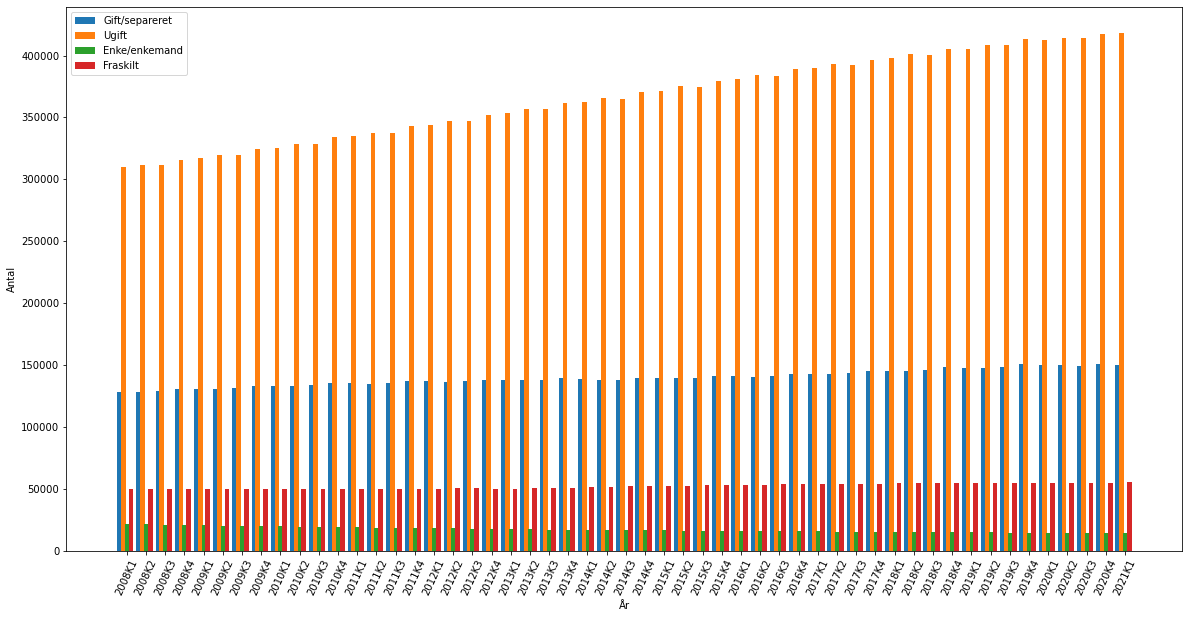

In [4]:
#1.5.C
fcsv_3 = './FOLK1A_5c.csv'
data_c = pd.read_csv(fcsv_3, sep=';')

sorting_dict = {'married': 'Gift/separeret', 'not_married': 'Ugift', 'widow': 'Enke/enkemand', 'divorced': 'Fraskilt'}
data_c_married = data_c[data_c['CIVILSTAND'] == sorting_dict['married']]
data_c_not_married = data_c[data_c['CIVILSTAND'] == sorting_dict['not_married']]
data_c_widow = data_c[data_c['CIVILSTAND'] == sorting_dict['widow']]
data_c_divorced = data_c[data_c['CIVILSTAND'] == sorting_dict['divorced']]

plt.figure(figsize=[20, 10])
length = len(list(data_c_married['TID']))
x = np.arange(length)
plt.bar(x, list(data_c_married['INDHOLD']), width = 0.25)
plt.bar(x + 0.2, list(data_c_not_married['INDHOLD']), width = 0.25)
plt.bar(x + 0.4, list(data_c_widow['INDHOLD']), width = 0.25)
plt.bar(x + 0.6, list(data_c_divorced['INDHOLD']), width = 0.25)
plt.legend([sorting_dict['married'], sorting_dict['not_married'], sorting_dict['widow'], sorting_dict['divorced']])
plt.xticks([i + 0.375 for i in range(length)], list(data_c_married['TID']), rotation=65)
plt.xlabel("År")
plt.ylabel("Antal")
plt.show()

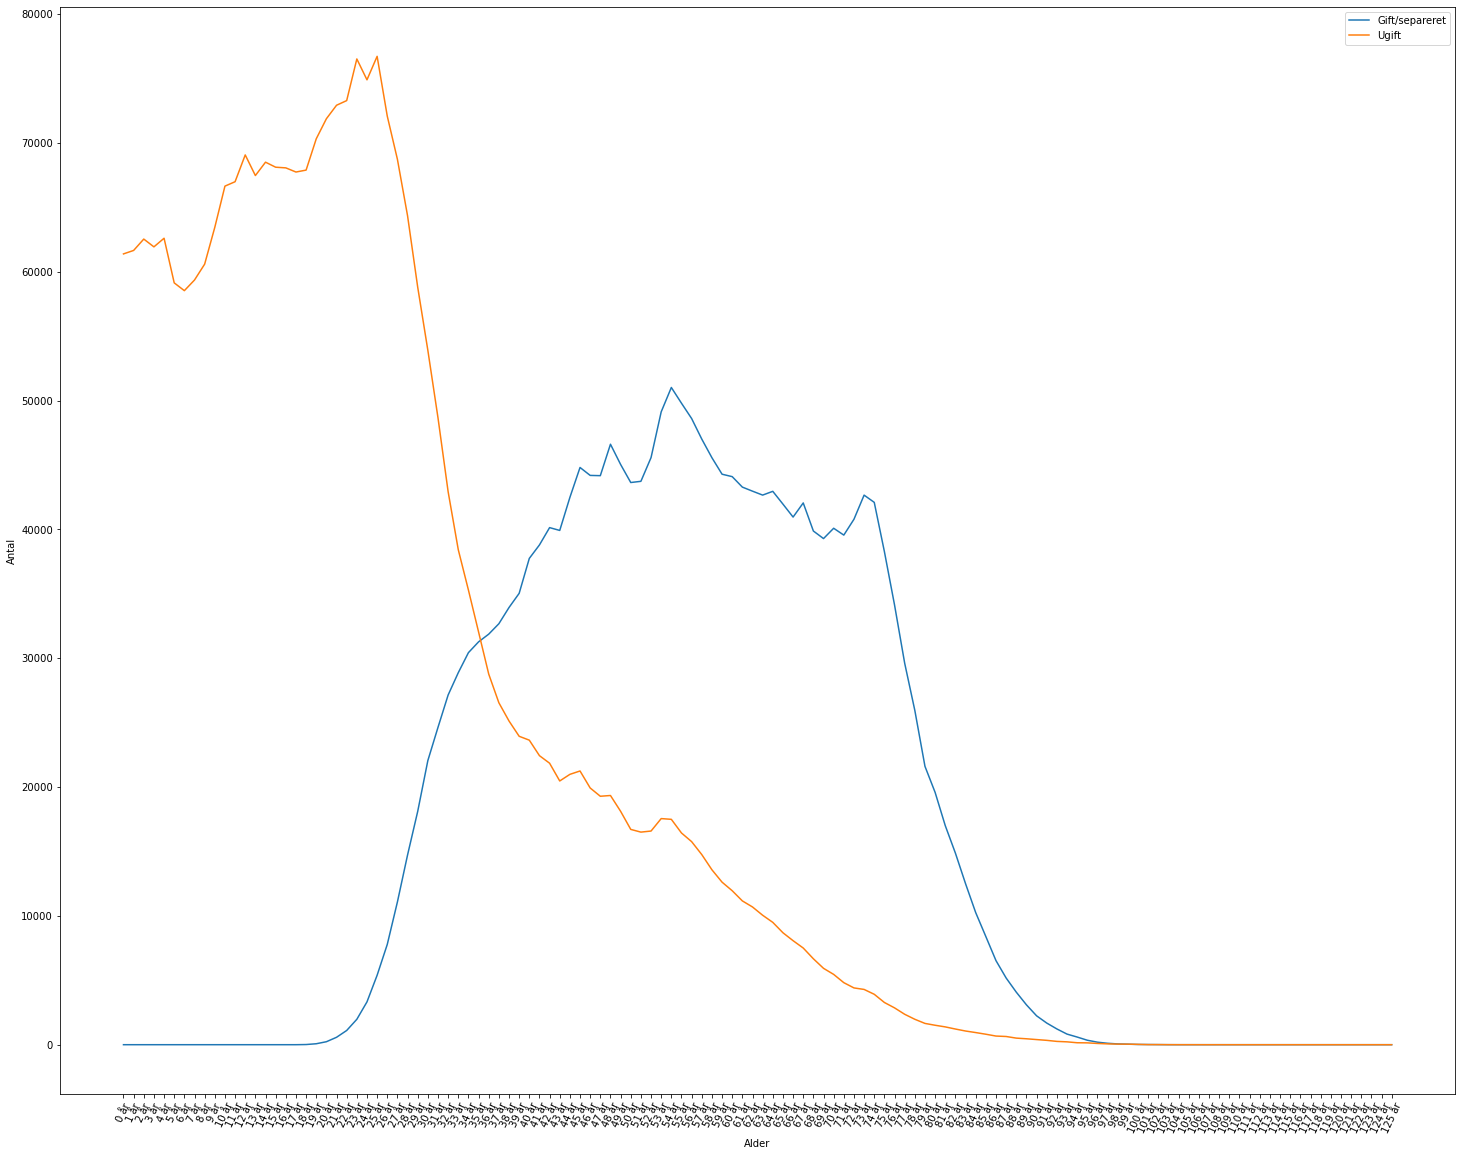

In [48]:
#1.5.D
fcsv_4 = './FOLK1A_5d.csv'
data_d = pd.read_csv(fcsv_4, sep=';')

data_d_married = data_d[data_d['CIVILSTAND'] == sorting_dict['married']]
data_d_not_married = data_d[data_d['CIVILSTAND'] == sorting_dict['not_married']]

plt.figure(figsize=[25, 20])
plt.plot(list(data_d_married['ALDER'][1:]), list(data_d_married['INDHOLD'][1:]))
plt.plot(list(data_d_not_married['ALDER'][1:]), list(data_d_not_married['INDHOLD'][1:]))
plt.legend([sorting_dict['married'], sorting_dict['not_married']])
plt.xticks(rotation=65)
plt.xlabel("Alder")
plt.ylabel("Antal")
plt.show()